# <img src="https://filoger.com/wp-content/uploads/2021/09/circle-logo-1536x1536.png" alt="keras" width="150" height="150">
<h1 align=center><font size = 7>Lab 05 : Polynomial Regression</font></h1>
<h1 align=center><font size = 4>Hands-On Machine Learning, 1401 | DeadLine: 10rd Aban, 13:00 </font></h1>



# Step0: Import Libraries

In [727]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import matplotlib
import math

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

# Step1: Read Data

In [728]:
df= pd.read_csv('Bank Customer Churn Prediction.csv')

# Step2: Data Overview

In [729]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [730]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Step3: Data Preprocessing

In [731]:
df.drop('customer_id', axis=1, inplace=True)

In [732]:
df.shape

(10000, 11)

In [733]:
df['churn'].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

<AxesSubplot:xlabel='churn', ylabel='count'>

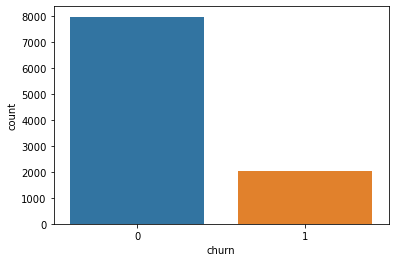

In [734]:
sns.countplot(data=df, x='churn')

In [735]:
df.corr()[['churn']].sort_values(by='churn', ascending=False).T 

,churn,age,balance,estimated_salary,credit_card,tenure,credit_score,products_number,active_member
churn,1.0,0.285323,0.118533,0.012097,-0.007138,-0.014001,-0.027094,-0.04782,-0.156128


<AxesSubplot:xlabel='age', ylabel='churn'>

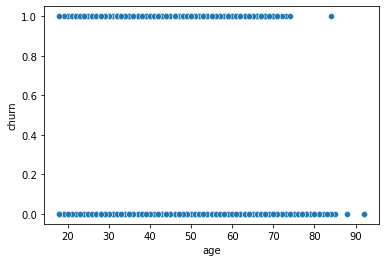

In [736]:
sns.scatterplot(data=df, x='age', y='churn')

# Step4: X, y

In [737]:
df['country'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [738]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [739]:
edt = pd.get_dummies(df['country'])
edt

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


In [740]:
edt.drop(['Spain'], axis=1, inplace=True)

In [741]:
df = df.join(edt)

In [742]:
df.head(3)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,France,Germany
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,0


In [743]:
df.drop(['country'], axis=1, inplace=True)

In [744]:
df.head(3)

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,France,Germany
0,619,Female,42,2,0.00,1,1,1,101348.88,1,1,0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,0
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,0


In [745]:
edt = pd.get_dummies(df['gender'])
edt

,Female,Male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
9995,0,1
9996,0,1
9997,1,0
9998,0,1


In [746]:
edt.drop(['Male'], axis=1, inplace=True)

In [747]:
df = df.join(edt)


In [748]:
df.head(3)

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,France,Germany,Female
0,619,Female,42,2,0.00,1,1,1,101348.88,1,1,0,1
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,1


In [749]:
df.drop(['gender'], axis=1, inplace=True)
df.head(3)

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,France,Germany,Female
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,1
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1


In [750]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   age               10000 non-null  int64  
 2   tenure            10000 non-null  int64  
 3   balance           10000 non-null  float64
 4   products_number   10000 non-null  int64  
 5   credit_card       10000 non-null  int64  
 6   active_member     10000 non-null  int64  
 7   estimated_salary  10000 non-null  float64
 8   churn             10000 non-null  int64  
 9   France            10000 non-null  uint8  
 10  Germany           10000 non-null  uint8  
 11  Female            10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(3)
memory usage: 732.5 KB


In [751]:
X = df.drop('churn', axis=1)

y = df['churn']

In [752]:
X

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,France,Germany,Female
0,619,42,2,0.00,1,1,1,101348.88,1,0,1
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,1
3,699,39,1,0.00,2,0,0,93826.63,1,0,1
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0
9997,709,36,7,0.00,1,0,1,42085.58,1,0,1
9998,772,42,3,75075.31,2,1,0,92888.52,0,1,0


In [753]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: churn, Length: 10000, dtype: int64

# Step5: Logistic Regression

## train_test_split

In [754]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [755]:
scaler = StandardScaler()

In [756]:
s_X_train = scaler.fit_transform(X_train)

s_X_test = scaler.transform(X_test)


In [757]:
s_X_train.shape , s_X_test.shape

((7000, 11), (3000, 11))

## Creat the Model

In [758]:
log = LogisticRegression()

## Train the Model

In [759]:
log.fit(s_X_train , y_train)

LogisticRegression()

## Print Coefficient

In [760]:
log.coef_

array([[-0.07551217,  0.74745494, -0.0620341 ,  0.17179097, -0.04344842,
        -0.02944316, -0.52288075,  0.00435489, -0.04487696,  0.29554607,
         0.26460667]])

##  Prediction & Evaluation
<hr>
print classification report

In [761]:
y_pred = log.predict(s_X_test)

In [762]:
accuracy_score(y_test, y_pred)

0.8113333333333334

In [763]:
y_test.value_counts()

0    2416
1     584
Name: churn, dtype: int64

In [764]:
confusion_matrix(y_test, y_pred)

array([[2318,   98],
       [ 468,  116]], dtype=int64)

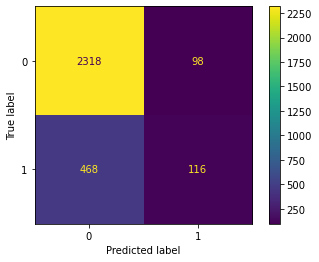

In [765]:
plot_confusion_matrix(log, s_X_test, y_test)

In [766]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2416
           1       0.54      0.20      0.29       584

    accuracy                           0.81      3000
   macro avg       0.69      0.58      0.59      3000
weighted avg       0.78      0.81      0.77      3000



[2.16717682]
[-26.11252416]


C:\Users\intel\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


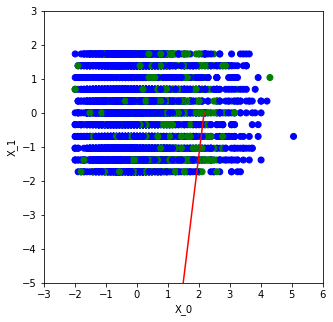

In [767]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

ax.set_xlabel('X_0')
ax.set_ylabel('X_1')

ax.axis([-3,6,-5,3])

label = y_train

colors = ['blue', 'green']

plt.scatter(s_X_train[:, 1], s_X_train[:,2], c=label, cmap=matplotlib.colors.ListedColormap(colors))

x1 = -log.intercept_ / log.coef_[0,1]
print(x1)
x2 = -log.intercept_ / log.coef_[0,2]
print(x2)

ax.plot([0, x1] , [x2+10, 0] , c = 'r')

### Sigmoid

In [ ]:
def sigmoid(z):
    
    g = 1 / (1 + np.exp(-z))
    
    return g

### Cost Function Logistic Regression

In [ ]:
def cost_function(X, y, w, b, CntTotal):
    
    m = X.shape[0]
    cost = 0
    for i in range(CntTotal):
        if y[i] is None 
            continue 
        z_i = np.dot(X[i], w) + b
        f_wb = sigmoid(z_i)
        
        cost += -y[i]* np.log(f_wb) - (1-y[i]) * np.log(1-f_wb)
        
    cost = cost/m
    
    return cost

### Gradient Descent

In [ ]:
def gradient(X, y, w, b, CntTotal):
    
    m = X.shape[0]
    n = X.shape[1]
    
    dj_dw = np.zeros((n,))
    dj_db = 0
    
    for i in range(CntTotal):
        if y[i] is None 
            continue 
        f_wb = sigmoid(np.dot(X[i], w) + b)
        
        loss = f_wb - y[i]
        
        for j in range(n):
            dj_dw[j] += loss * X[i, j]
        dj_db += loss
        
    dj_dw = dj_dw/m
    
    dj_db = dj_db/m
    
    return dj_dw, dj_db

### RUN Gradient Descent

In [ ]:
def gradient_des(X, y, W, b, alpha, iters, CntTotal):
    J_history = []
    
    for i in range(iters):
        dj_dw, dj_db = gradient(X, y, W, b, CntTotal)
        
        W = W - alpha * dj_dw
        b = b - alpha * dj_db
        
        cost = cost_function(X, y, W, b, CntTotal)
        J_history.append(cost)
        
        print("iter:", i, "Cost: ", J_history[i])
    return W, b 

In [ ]:
W = np.zeros(s_X_train.shape[1]) 
b = 1 
alpha = 0.1 
iters = 10000 
W, b = gradient_des(s_X_train , y_train, W, b, alpha, iters , s_X_train.shape[0]) 

### Another GD scratch

In [ ]:
def Logistics_Regression(X,y,learningrate, iterations):
    """ Find the Logistics regression model for the data set
         Parameters:
          X: independent variables matrix
          y: dependent variables matrix
          learningrate: learningrate of Gradient Descent
          iterations: the number of iterations
        Return value: the final theta vector and the plot of cost function
    """
    y_new = np.reshape(y, (len(y), 1))   
    cost_lst = []
    vectorX = generateXvector(X)
    theta = theta_init(X)
    m = len(X)
    for i in range(iterations):
        gradients = 2/m * vectorX.T.dot(sigmoid_function(vectorX.dot(theta)) - y_new)
        theta = theta - learningrate * gradients
        y_pred = sigmoid_function(vectorX.dot(theta))
        cost_value = - np.sum(np.dot(y_new.T,np.log(y_pred)+ np.dot((1-y_new).T,np.log(1-y_pred)))) /(len(y_pred))
 #Calculate the loss for each training instance
        cost_lst.append(cost_value)
    plt.plot(np.arange(1,iterations),cost_lst[1:], color = 'red')
    plt.title('Cost function Graph')
    plt.xlabel('Number of iterations')
    plt.ylabel('Cost')
    return theta

In [ ]:
def sigmoid_function(X):
    """ Calculate the sigmoid value of the inputs
         Parameters:
          X:  values
        Return value: the sigmoid value
    """
    return 1/(1+math.e**(-X))

In [ ]:
def theta_init(X):
    """ Generate an initial value of vector θ from the original independent variables matrix
         Parameters:
          X:  independent variables matrix
        Return value: a vector of theta filled with initial guess
    """
    theta = np.random.randn(len(X[0])+1, 1)
    return theta

In [ ]:
def generateXvector(X):
    """ Taking the original independent variables matrix and add a row of 1 which corresponds to x_0
        Parameters:
          X:  independent variables matrix
        Return value: the matrix that contains all the values in the dataset, not include the outcomes variables. 
    """    
    vectorX = np.c_[np.ones((len(X), 1)), X]
    return vectorX

In [ ]:
def column(matrix, i):
    """ Returning all the values in a specific columns
         Parameters:
          X: the input matrix
          i: the column
     Return value: an array with desired column
    """
    return [row[i] for row in matrix]

def accuracy_LR(X,y,learningrate, iteration,X_test, y_test):
    """ Returning the accuracy score for a training model
    """
    
    ideal = Logistics_Regression(X,y,learningrate, iteration)
    hypo_line = ideal[0]
    for i in range(1,len(ideal)):
        hypo_line = hypo_line + ideal[i]*column(X_test,i-1)
    logistic_function = sigmoid_function(hypo_line)
    
    for i in range(len(logistic_function)):
        if logistic_function[i] >= 0.5:
            logistic_function[i] = 1
        else:
            logistic_function[i] = 0
    last1 = np.concatenate((logistic_function.reshape(len(logistic_function),1), y_test.reshape(len(y_test),1)),1)
    
    count = 0
    for i in range(len(y_test)):
        if last1[i][0] == last1[i][1]:
            count = count+1
    acc = count/(len(y_test))
    
    return acc

In [ ]:
Logistics_Regression(s_X_train , y_train, 0.1, 1000000)

In [ ]:
accuracy_LR(X_train,y_train, 1, 1000000,X_test, y_test)

# <div class="alert alert-success" role="alert">
  <h1 class="alert-heading">Well done!</h1>
  <p>Best Wishes!, Filoger</p>
</div>